In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FRKM123.csv', sep=';')
df = df.loc[df.ALDER != 'TOT']
pop_rename = {
    'KØN':'Gender',
    'ALDER':'RespAgeCorrect',
    'OMRÅDE':'MunicipalityOrigin',
    'INDHOLD':'total',

}

df.rename(index=str, columns=pop_rename, inplace=True)
df.Gender = df.Gender.astype('category').cat.rename_categories({'M':1, 'K':2})
df.RespAgeCorrect = df.RespAgeCorrect.astype('category').cat.rename_categories({'100-':'100'})
df.RespAgeCorrect = df.RespAgeCorrect.astype('int64').astype('category')
#df = df.loc[df.RespAgeCorrect.astype('int64') > 4]
df = df[['MunicipalityOrigin','Gender','RespAgeCorrect', 'total']]
df.MunicipalityOrigin = df.MunicipalityOrigin.astype('category')
df = df.loc[df.RespAgeCorrect.astype('int64') <100]
df_plot = df.copy()

In [3]:
popSocio = pd.read_csv('popSociop.csv')
popSocio.PopSocio = popSocio.PopSocio.astype('category')

In [4]:
df = df.loc[df.index.repeat(df['total'])]
df['PopSocio'] = pd.Series()
df.loc[df['RespAgeCorrect'].astype('int64') < 16, 'PopSocio'] = 0
df.loc[df['RespAgeCorrect'].astype('int64') > 69, 'PopSocio'] = 3
empty_indices = df['PopSocio'].isna()
probabilities = [0.156865, 0.615444, 0.029741, (1-0.156865-0.615444-0.029741)]  # Adjust the probabilities as needed
sampled_values = np.random.choice([0, 1, 2, 3], sum(empty_indices), p=probabilities)
df.loc[empty_indices, 'PopSocio'] = sampled_values

In [5]:
age = pd.read_csv('RespAgeCorrectp.csv')
age

,RespAgeCorrect,total
0,0,0.010556
1,1,0.010633
2,2,0.010673
3,3,0.010768
4,4,0.010246
...,...,...
121,121,0.000000
122,122,0.000000
123,123,0.000000
124,124,0.000000


In [6]:
df[['RespAgeCorrect', 'total']]

,RespAgeCorrect,total
0,10,49
0,10,49
0,10,49
0,10,49
0,10,49
...,...,...
20195,46,213
20195,46,213
20195,46,213
20195,46,213


In [7]:
pd.DataFrame(df_plot.groupby(['MunicipalityOrigin']).total.sum().reset_index()).to_csv('2050/mun2050.csv')

In [8]:
age2050 = df_plot.groupby(['RespAgeCorrect']).total.sum().reset_index()

In [9]:
age2050['total'] = age2050['total']/age2050['total'].sum()

In [10]:
pd.read_csv('gender.csv', sep=';',header=None)

,0,1
0,1,2896918
1,2,2925845


In [11]:
pd.DataFrame(df_plot.groupby(['Gender']).total.sum())['total']/df_plot.total.sum()

Gender
2    0.502232
1    0.497768
Name: total, dtype: float64

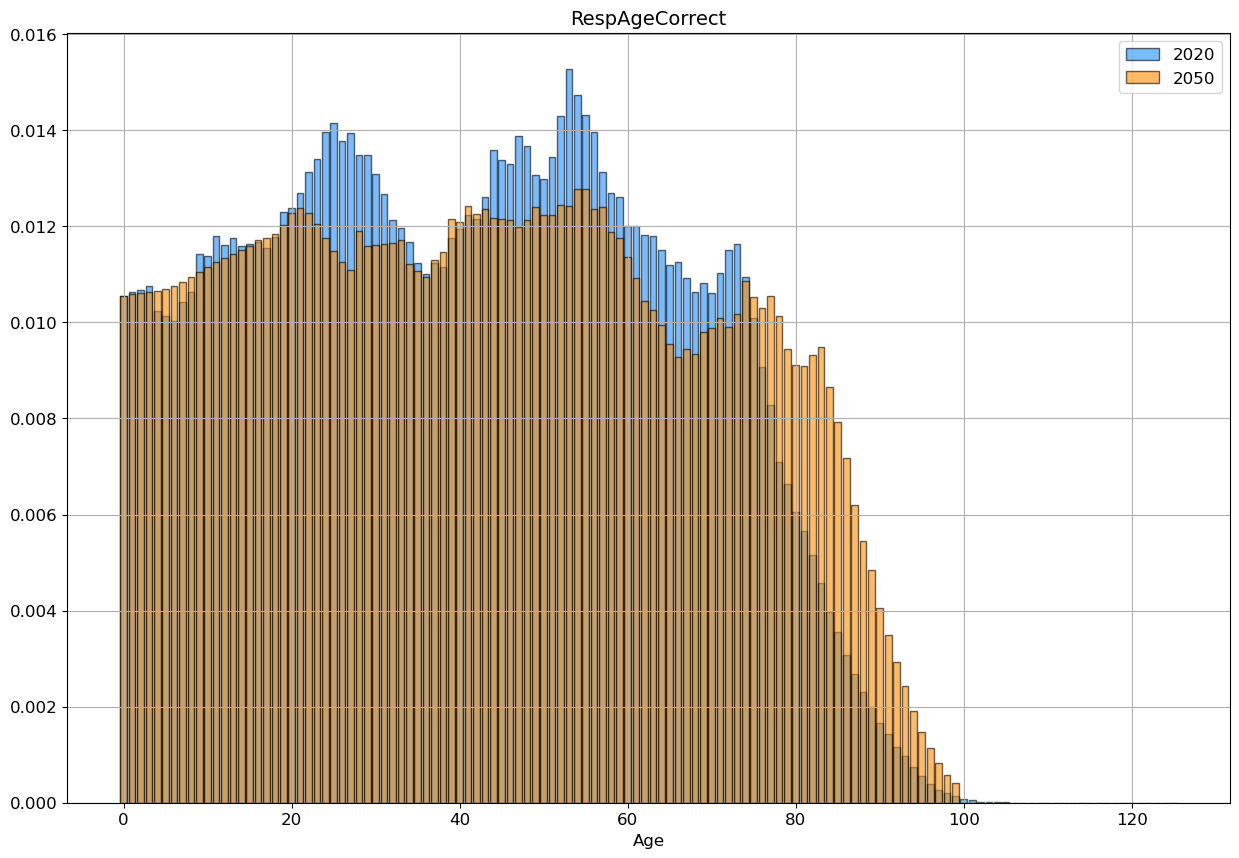

In [12]:
plt.rcParams['font.size'] = '12'

fig, axs = plt.subplots(1, 1, figsize=(15, 10)) 


#axs.bar(age['RespAgeCorrect'], age['total'] ,color='dodgerblue', alpha = 0.7, edgecolor='black')
axs.bar(age['RespAgeCorrect'], age['total'] ,color='dodgerblue', alpha = 0.6, edgecolor='black', label='2020')
axs.bar(age2050['RespAgeCorrect'], age2050['total'] ,color='darkOrange', alpha = 0.6, edgecolor='black', label='2050')
axs.set_title('RespAgeCorrect', fontsize=14)
axs.set_xlabel('Age', fontsize=12)
axs.set_ylabel('', fontsize=12)
#axs.set_xticklabels(axs.get_xticklabels(), rotation=0, fontsize=12)
#axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 
axs.grid(True)
axs.legend()

fig.savefig('2050/age.png')


In [13]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'int64',
    'FamNumPers': 'int64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'int64',
    'HousehNumPers': 'int64',
    'HousehNumcars': 'int64',
    'HwDayspW': 'category',
    'IncFamily2000': 'int64',
    'IncRespondent2000': 'int64',
    'KidsBetween0and4': 'int64',
    'KidsBetween4and15': 'int64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'int64',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'int64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}
pop_2050 = pd.read_csv('ciDatGan_synthetic_9_Pop_2050.csv', dtype=df_dtypes)

In [14]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'int64',
    'FamNumPers': 'int64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'int64',
    'HousehNumPers': 'int64',
    'HousehNumcars': 'int64',
    'HwDayspW': 'category',
    'IncFamily2000': 'int64',
    'IncRespondent2000': 'int64',
    'KidsBetween0and4': 'int64',
    'KidsBetween4and15': 'int64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'int64',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'int64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}
pop_2020 = pd.read_csv('ciDatGan_synthetic_9_PopMarg.csv', dtype=df_dtypes)

In [15]:
df = pop_2050.copy()

In [16]:
df1=pop_2020.copy()

In [17]:
df.columns

Index(['HousehCarOwnership', 'IncFamily2000', 'FamNumAdults', 'FamNumPers',
       'HousehNumAdults', 'HousehNumPers', 'IncRespondent2000', 'WorkHoursPw',
       'HousehNumcars', 'Year', 'Gender', 'RespAgeCorrect', 'Education',
       'Handicap', 'PopSocio', 'RespPrimOcc', 'KidsBetween0and15',
       'KidsBetween0and4', 'CarModelYear', 'MunicipalityOrigin',
       'MunicipalityDest', 'HomeAdrZone', 'PrimOccZone', 'WorkHourType',
       'RespHasBicycle', 'ResphasDrivlic', 'RespHasRejsekort',
       'RespIsmemCarshare', 'Sector', 'HwDayspW', 'FuelType', 'HomeParkPoss',
       'RespHasSeasonticket', 'HousehAccomodation', 'HousehAccOwnorRent',
       'PosInFamily', 'PrimModeDay', 'ModeChainTypeDay'],
      dtype='object')

In [18]:
df['ResphasDrivlic'] = df['ResphasDrivlic'].cat.rename_categories({'-18.0':'Under 18','1.0':'Yes', '2.0':'No', '3.0':'Has had'})
df1['ResphasDrivlic'] = df1['ResphasDrivlic'].cat.rename_categories({'-18.0':'Under 18','1.0':'Yes', '2.0':'No', '3.0':'Has had'})
value_counts = df['ResphasDrivlic'].value_counts(normalize=True).sort_index()
value_counts1 = df1['ResphasDrivlic'].value_counts(normalize=True).sort_index()
merged_df = pd.merge(value_counts, value_counts1, on='ResphasDrivlic')

In [19]:
merged_df

,proportion_x,proportion_y
ResphasDrivlic,,
Under 18,0.083217,0.089472
Yes,0.847813,0.849875
No,0.053958,0.049528
Has had,0.015012,0.011125


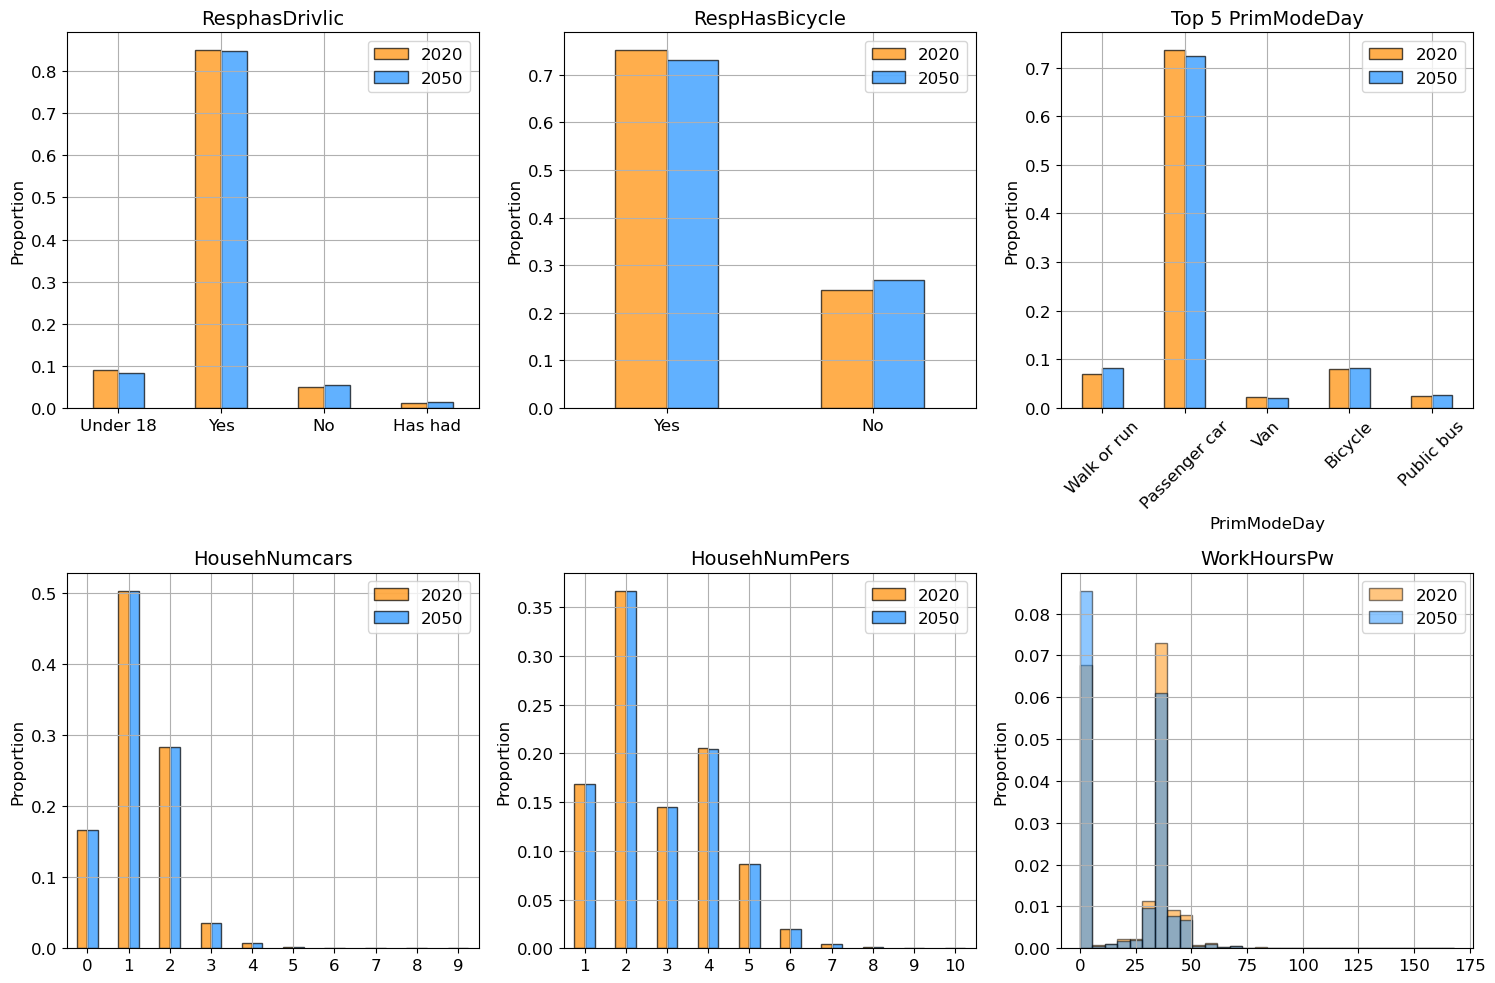

In [21]:
plt.rcParams['font.size'] = '12'

fig, axs = plt.subplots(2, 3, figsize=(15, 10)) 


df1['ResphasDrivlic'] = df1['ResphasDrivlic'].cat.rename_categories({'-18.0':'Under 18','1.0':'Yes', '2.0':'No', '3.0':'Has had'})
df['ResphasDrivlic'] = df['ResphasDrivlic'].cat.rename_categories({'-18.0':'Under 18','1.0':'Yes', '2.0':'No', '3.0':'Has had'})
value_counts1 = df1['ResphasDrivlic'].value_counts(normalize=True).sort_index()
value_counts = df['ResphasDrivlic'].value_counts(normalize=True).sort_index()

merged_df = pd.merge(value_counts1, value_counts, on='ResphasDrivlic')

merged_df = merged_df.rename(columns={"proportion_x": "2020", "proportion_y": "2050"})

merged_df.plot(kind='bar', color=['darkorange','dodgerblue'], ax=axs[0,0], alpha = 0.7, edgecolor='black', label=['2020','2050'])
axs[0,0].set_title('ResphasDrivlic', fontsize=14)
axs[0,0].set_xlabel('', fontsize=12)
axs[0,0].set_ylabel('Proportion', fontsize=12)
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=0, fontsize=12)
#axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 
axs[0,0].grid(True)


df1['RespHasBicycle'] = df1['RespHasBicycle'].cat.rename_categories({'1.0':'Yes', '2.0':'No'})
df['RespHasBicycle'] = df['RespHasBicycle'].cat.rename_categories({'1.0':'Yes', '2.0':'No'})
value_counts1 = df1['RespHasBicycle'].value_counts(normalize=True).sort_index()
value_counts = df['RespHasBicycle'].value_counts(normalize=True).sort_index()

merged_df = pd.merge(value_counts1, value_counts, on='RespHasBicycle')

merged_df = merged_df.rename(columns={"proportion_x": "2020", "proportion_y": "2050"})

merged_df.plot(kind='bar', color=['darkorange','dodgerblue'], ax=axs[0,1], alpha = 0.7, edgecolor='black')

#axs[0,3].hist(df['Gender'].sort_values(), color='dodgerblue', alpha = 0.7, edgecolor='black', rwidth=1)
axs[0,1].set_title('RespHasBicycle', fontsize=14)
axs[0,1].set_xlabel('', fontsize=12)
axs[0,1].set_ylabel('Proportion', fontsize=12)
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=0, fontsize=12)
#axs[1,1].set_yticklabels(axs[0,3].get_yticklabels(),  fontsize=12) 
axs[0,1].grid(True)


value_counts1 = df1['HousehNumPers'].value_counts(normalize=True).sort_index()
value_counts = df['HousehNumPers'].value_counts(normalize=True).sort_index()

merged_df = pd.merge(value_counts1, value_counts, on='HousehNumPers')

merged_df = merged_df.rename(columns={"proportion_x": "2020", "proportion_y": "2050"})

merged_df.head(10).plot(kind='bar', color=['darkorange','dodgerblue'], ax=axs[1,1], alpha = 0.7, edgecolor='black')
#axs[1,1].bar(df['Education'].value_counts() ,color='dodgerblue', alpha = 0.7, edgecolor='black')
axs[1,1].set_title('HousehNumPers', fontsize=14)
axs[1,1].set_xlabel('', fontsize=12)
#axs[1,0].set_xlabel('PosInFamily', fontsize=12)
axs[1,1].set_ylabel('Proportion', fontsize=12)
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=0, fontsize=12)
#axs[2,1].set_yticklabels(axs[1,1].get_yticklabels(),  fontsize=12) 
axs[1,1].grid(True)

#value_counts = df['WorkHoursPw'].value_counts().sort_index()
#value_counts.plot(kind='bar', color='dodgerblue', ax=axs[1,1], alpha = 0.7, edgecolor='black')
axs[1,2].hist(df1['WorkHoursPw'], bins=30 ,color='darkorange', alpha = 0.5, edgecolor='black', density=True, label='2020')
axs[1,2].hist(df['WorkHoursPw'], bins=30 ,color='dodgerblue', alpha = 0.5, edgecolor='black', density=True, label='2050')
#axs[2,1].hist(pd.to_numeric(df['RespPrimOcc'], errors='coerce').astype('Int64').astype('str'), bins=20 ,color='dodgerblue', alpha = 0.7, edgecolor='black')
axs[1,2].set_title('WorkHoursPw', fontsize=14)
axs[1,2].set_xlabel('', fontsize=12)
axs[1,2].set_ylabel('Proportion', fontsize=12)
#axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=0, fontsize=12)
#axs[1,3].set_yticklabels(axs[1,3].get_yticklabels(),  fontsize=12) 
axs[1,2].legend()
axs[1,2].grid(True)


df1['PrimModeDay'] = df1['PrimModeDay'].cat.rename_categories({'1.0':'Walk or run', '2.0':'Bicycle', '11.0':'Passenger car', '31.0': 'Public bus', '12.0':'Van'})
df['PrimModeDay'] = df['PrimModeDay'].cat.rename_categories({'1.0':'Walk or run', '2.0':'Bicycle', '11.0':'Passenger car', '31.0': 'Public bus', '12.0':'Van'})
value_counts1 = df1['PrimModeDay'].value_counts(normalize=True).sort_index()
value_counts = df['PrimModeDay'].value_counts(normalize=True).sort_index()

value_counts = value_counts.loc[value_counts.index.isin(['Walk or run', 'Bicycle', 'Passenger car',  'Public bus', 'Van'])]
value_counts1= value_counts1.loc[value_counts1.index.isin(['Walk or run', 'Bicycle', 'Passenger car',  'Public bus', 'Van'])]
merged_df = pd.merge(value_counts1, value_counts, on='PrimModeDay')

merged_df = merged_df.rename(columns={"proportion_x": "2020", "proportion_y": "2050"})

merged_df.head(5).plot(kind='bar', color=['darkorange','dodgerblue'], ax=axs[0,2], alpha = 0.7, edgecolor='black')
df['PrimModeDay'] = df['PrimModeDay'].cat.rename_categories({'1.0':'Walk or run', '2.0':'Bicycle', '11.0':'Passenger car', '31.0': 'Public bus', '12.0':'Van'})
#value_counts = df['PrimModeDay'].value_counts(normalize=True)
#value_counts.head(5).plot(kind='bar', color='dodgerblue', ax=axs[2,0], alpha = 0.7, edgecolor='black')
#axs[2,1].bar(df['Education'].value_counts() ,color='dodgerblue', alpha = 0.7, edgecolor='black')
axs[0,2].set_title('Top 5 PrimModeDay', fontsize=14)
#axs[2,0].set_xlabel('', fontsize=12)
axs[0,2].set_ylabel('Proportion', fontsize=12)
axs[0,2].set_xticklabels(axs[0,2].get_xticklabels(), rotation=45, fontsize=12)
#axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(),  fontsize=12) 
axs[0,2].grid(True)


value_counts1 = df1['HousehNumcars'].value_counts(normalize=True).sort_index()
value_counts = df['HousehNumcars'].value_counts(normalize=True).sort_index()

merged_df = pd.merge(value_counts1, value_counts, on='HousehNumcars')

merged_df = merged_df.rename(columns={"proportion_x": "2020", "proportion_y": "2050"})

merged_df.head(10).plot(kind='bar', color=['darkorange','dodgerblue'], ax=axs[1,0], alpha = 0.7, edgecolor='black')
#axs[1,1].hist(pd.to_numeric(df['RespPrimOcc'], errors='coerce').astype('Int64').astype('str'), bins=20 ,color='dodgerblue', alpha = 0.7, edgecolor='black')
axs[1,0].set_title('HousehNumcars', fontsize=14)
axs[1,0].set_xlabel('', fontsize=12)
axs[1,0].set_ylabel('Proportion', fontsize=12)
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=0, fontsize=12)
#axs[1,3].set_yticklabels(axs[1,3].get_yticklabels(),  fontsize=12) 
axs[1,0].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('2050/distributions.png')

In [ ]:
value_counts = df['PrimModeDay'].value_counts(normalize=True).sort_index()
value_counts.plot(kind='bar', color='dodgerblue', ax=axs[2,0], alpha = 0.7, edgecolor='black')
#axs[2,1].bar(df['Education'].value_counts() ,color='dodgerblue', alpha = 0.7, edgecolor='black')
axs[2,0].set_title('PrimModeDay', fontsize=14)
#axs[2,0].set_xlabel('PosInFamily', fontsize=12)
axs[2,0].set_ylabel('Count', fontsize=12)
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation=0, fontsize=12)
#axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(),  fontsize=12) 
axs[2,0].grid(True)